In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
#coordonnée de la personne 1
x1 = 30
y1 = 50
pos1 = np.array((x1,y1))

x2 = 15
y2 = 60
pos2 = np.array((x2,y2))

#coordonnée de sortie
sx1 = 0
sy1 = 0
sx2 = 30
sy2 = 0
sortie1 = np.array((sx1,sy1))
sortie2 = np.array((sx2,sy2))
sortie = np.array((sortie1,sortie2))


#vitesse de mouvement de la personne
v = 1.5 #m/s

#temps
dt = 1
tmax = 20

In [9]:
def direction(pos,sortie):
    d = sortie - pos
    d = d/np.sqrt(d[0]**2+d[1]**2)
    return d

print(direction(pos1,sortie1))

def step(pos,sortie,v,dt): 
    dir = direction(pos,sortie)
    return v*dt*dir


def positions_individu(pos,sortie,v,dt,t_max):
    p = pos
    res = [p]
    t = 0
    while (t<t_max):
        p = p + step(p,sortie,v,dt)
        res.append(p)
        t = t + dt
    return res


def sortiePlusProche(pos,sortie):
    d = np.linalg.norm(sortie - pos, axis=1)
    return np.argmin(d)
        
s_pos1 = sortiePlusProche(pos1,sortie)
s_pos2 = sortiePlusProche(pos2,sortie)

position_x1 = [i[0] for i in positions_individu(pos1,sortie[s_pos1],v,dt,tmax)]
position_y1 = [i[1] for i in positions_individu(pos1,sortie[s_pos1],v,dt,tmax)]
position_x2 = [i[0] for i in positions_individu(pos2,sortie[s_pos2],v,dt,tmax)]
position_y2 = [i[1] for i in positions_individu(pos2,sortie[s_pos2],v,dt,tmax)]

print(positions_individu(pos1,sortie[s_pos1],v,dt,tmax))

#position_x1 = [i[0] for i in positions_individu(pos1,sortie[s_pos1],obstacle,v,dt,tmax)]
#position_y1 = [i[1] for i in positions_individu(pos1,sortie[s_pos1],obstacle,v,dt,tmax)]
#position_x2 = [i[0] for i in positions_individu(pos2,sortie[s_pos2],obstacle,v,dt,tmax)]
#position_y2 = [i[1] for i in positions_individu(pos2,sortie[s_pos2],obstacle,v,dt,tmax)]

[-0.51449576 -0.85749293]
[array([30, 50]), array([30. , 48.5]), array([30., 47.]), array([30. , 45.5]), array([30., 44.]), array([30. , 42.5]), array([30., 41.]), array([30. , 39.5]), array([30., 38.]), array([30. , 36.5]), array([30., 35.]), array([30. , 33.5]), array([30., 32.]), array([30. , 30.5]), array([30., 29.]), array([30. , 27.5]), array([30., 26.]), array([30. , 24.5]), array([30., 23.]), array([30. , 21.5]), array([30., 20.])]


In [6]:
#obstacle
obs_a = np.array((25,25)) 
obs_b = np.array((35,25))

def positions_obstacle(point_a,point_b,delta_d):
    #ensemble des points d'un obstacle
    #delta_d = distance entre chaque points
    point = point_a
    l_obs = [point]
    dir = direction(point_a,point_b)
    
    d_max = point_b- point_a
    d_max = np.sqrt(d_max[0]**2+d_max[1]**2)
    d = 0
    
    while (d < d_max):
        point = point + dir * delta_d
        l_obs.append(point)
        d = d + delta_d
    return l_obs

obstacle = positions_obstacle(obs_a,obs_b,0.1) #liste des coord des points d'un obstacle
obs_x = [i[0] for i in obstacle]
obs_y = [i[1] for i in obstacle]
print(obstacle)

[array([25, 25]), array([25.1, 25. ]), array([25.2, 25. ]), array([25.3, 25. ]), array([25.4, 25. ]), array([25.5, 25. ]), array([25.6, 25. ]), array([25.7, 25. ]), array([25.8, 25. ]), array([25.9, 25. ]), array([26., 25.]), array([26.1, 25. ]), array([26.2, 25. ]), array([26.3, 25. ]), array([26.4, 25. ]), array([26.5, 25. ]), array([26.6, 25. ]), array([26.7, 25. ]), array([26.8, 25. ]), array([26.9, 25. ]), array([27., 25.]), array([27.1, 25. ]), array([27.2, 25. ]), array([27.3, 25. ]), array([27.4, 25. ]), array([27.5, 25. ]), array([27.6, 25. ]), array([27.7, 25. ]), array([27.8, 25. ]), array([27.9, 25. ]), array([28., 25.]), array([28.1, 25. ]), array([28.2, 25. ]), array([28.3, 25. ]), array([28.4, 25. ]), array([28.5, 25. ]), array([28.6, 25. ]), array([28.7, 25. ]), array([28.8, 25. ]), array([28.9, 25. ]), array([29., 25.]), array([29.1, 25. ]), array([29.2, 25. ]), array([29.3, 25. ]), array([29.4, 25. ]), array([29.5, 25. ]), array([29.6, 25. ]), array([29.7, 25. ]), arr

In [21]:
directions = np.array(((1,0),(-1,0),(0,1),(0,-1)))
coord = np.array((20,30))
coord2 = coord+v*dt*directions[0]
print(coord)
print(coord2)

[20 30]
[21.5 30. ]


In [16]:
def deplace_vers(coord,obstacle,v,dt):
    #coord : coord actuel de la personne
    #obstacle : liste des points
    liste_direction = np.array(((1,0),(-1,0),(0,1),(0,-1))) #droite,gauche,hau,bas
    for i in liste_direction:
        p = coord + v*dt*i #le prochain coord de la personne
        if p not in obstacle :
            return p


coord = np.array((20,30))
print(coord+v*dt*directions[0])
deplace_vers(coord,obstacle,v,dt)
        

def positions_individu(pos,sortie,obstacle,v,dt,t_max):
    res = []
    t = 0
    p = pos
    while (t<t_max):
        step = step(p,sortie,v,dt)
        p = p + step
        if p not in obstacle:
            res.append(p)
        else:
            p = deplace_vers(p,obstacle,v,dt)
        t = t + dt
    return res

[21.5 30. ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

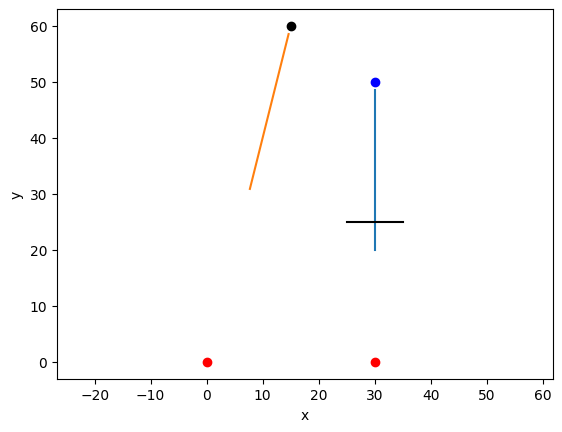

In [45]:
plt.plot(position_x1,position_y1)
plt.plot(position_x2,position_y2)
plt.xlabel("x")
plt.ylabel("y")

#individu
plt.plot(x1,y1,"bo")
plt.plot(x2,y2,"ko")
#sortie
plt.plot(sortie[0][0],sortie[0][1],"ro")
plt.plot(sortie[1][0],sortie[1][1],"ro")
#obstacle
plt.plot(obs_x,obs_y,"k-")

plt.axis("equal")
plt.show()